# Task 1: Experimental design and A/B testing

Task: Design and analyze A/B tests for a hypothetical scenario.

hypothesize that version B will lead to a higher conversion rate compared to version A.

In [1]:
import pandas as pd
import numpy as np

## Creating Random Data for A and B Page Versions

In [43]:
np.random.seed(42)

# Page/Version A data
A_conversion = np.random.binomial(n=1, p=0.02, size=500)
A_click_through = np.random.binomial(n=1, p=0.40, size=500)
A_bounce = np.random.binomial(n=1, p=0.80, size=500)
A_order_value = np.random.normal(loc=50, scale=10, size=500)

# Page/Version B data
B_conversion = np.random.binomial(n=1, p=0.15, size=500)
B_click_through = np.random.binomial(n=1, p=0.45, size=500)
B_bounce = np.random.binomial(n=1, p=0.75, size=500)
B_order_value = np.random.normal(loc=60, scale=12, size=500)

df = pd.DataFrame({
    'Version': ['A'] * 500 + ['B'] * 500,
    'Conversion': np.concatenate([A_conversion, B_conversion]),
    'Click_through': np.concatenate([A_click_through, B_click_through]),
    'Bounce': np.concatenate([A_bounce, B_bounce]),
    'Order_Value': np.concatenate([A_order_value, B_order_value]),
})

df

,Version,Conversion,Click_through,Bounce,Order_Value
0,A,0,1,1,25.005943
1,A,0,0,1,72.909426
2,A,0,0,0,36.104275
3,A,0,1,1,33.546013
4,A,0,1,0,60.225704
...,...,...,...,...,...
995,B,0,0,1,48.425546
996,B,0,0,1,66.071587
997,B,0,1,0,51.260734
998,B,0,1,1,85.980673


In [41]:
df.describe()

,Conversion,Click_through,Bounce,Order_Value
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.079000,0.404000,0.765000,55.200524
std,0.269874,0.490943,0.424211,12.300895
min,0.000000,0.000000,0.000000,20.786495
25%,0.000000,0.000000,1.000000,46.768892
50%,0.000000,0.000000,1.000000,54.572486
75%,0.000000,1.000000,1.000000,63.593777
max,1.000000,1.000000,1.000000,107.114852


## Hypothesis Testing

**Null Hypothesis (H0): There is no significant difference between the conversion rate of Version A and Version B.**

**Alternative Hypothesis (Ha): There is a significant difference between the conversion rate of Version A and Version B.**

### Hypothesis between conversion rates

In [51]:
from scipy.stats import ttest_ind

# calculate t_test between conversion rates
t_stat, p_value = ttest_ind(df[df.Version=='A']['Conversion'], df[df.Version=='B']['Conversion'])
print(f't_stat: {t_stat}\np_value:{p_value}', end='\n\n')

# significance level
alpha = 0.05
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis.")
    print("Version B leads to a higher conversion rate compared to Version A.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("There is no significant difference in conversion rates between Version A and Version B.")

t_stat: -7.588276816916516
p_value:7.418185923338823e-14

There is significant evidence to reject the null hypothesis.
Version B leads to a higher conversion rate compared to Version A.


### Confidence Interval Function

In [56]:
# Confidence Interval
import math

def Confidence_Interval(columns):
    columns_mean = columns.mean()
    columns_std = columns.std()

    columns_standard_error = columns_std/len(columns)
    columns_margin_error = columns_standard_error/2

    confidence_level = 0.95

    upper_bound = columns_mean + confidence_level * (columns_std / math.sqrt(10))
    lower_bound = columns_mean - confidence_level * (columns_std / math.sqrt(10))

    confidence_intervals = pd.DataFrame({
        'Sample Size': columns.count(),
        'Sample Mean': columns_mean,
        'Standard Error': columns_standard_error,
        'Margin of Error': columns_margin_error,
        'Lower Bound (95% CI)': lower_bound,
        'Upper Bound (95% CI)': upper_bound
    })

    return confidence_intervals

In [87]:
print("Conversion Rate Confidence Interval Values\n")
Confidence_Interval(df.loc[df.Version=='A', ['Conversion']])

Conversion Rate Confidence Interval Values



,Sample Size,Sample Mean,Standard Error,Margin of Error,Lower Bound (95% CI),Upper Bound (95% CI)
Conversion,500,0.016,0.000251,0.000126,-0.021733,0.053733


In [86]:
Confidence_Interval(df.loc[df.Version=='B', ['Conversion']])

,Sample Size,Sample Mean,Standard Error,Margin of Error,Lower Bound (95% CI),Upper Bound (95% CI)
Conversion,500,0.142,0.000699,0.000349,0.037035,0.246965


### Hypothesis between Click Through

In [88]:
from scipy.stats import ttest_ind

# calculate t_test between Click_through
t_stat, p_value = ttest_ind(df[df.Version=='A']['Click_through'], df[df.Version=='B']['Click_through'])
print(f't_stat: {t_stat}\np_value:{p_value}', end='\n\n')

# significance level
alpha = 0.05
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis.")
    print("Version B leads to a higher Click through compared to Version A.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("There is no significant difference in Click through between Version A and Version B.")

t_stat: -2.8441804218860818
p_value:0.00454353573685893

There is significant evidence to reject the null hypothesis.
Version B leads to a higher Click through compared to Version A.


In [89]:
print("Click Through Confidence Interval Values\n")
Confidence_Interval(df.loc[df.Version=='A', ['Click_through']])

Click Through Confidence Interval Values



,Sample Size,Sample Mean,Standard Error,Margin of Error,Lower Bound (95% CI),Upper Bound (95% CI)
Click_through,500,0.36,0.000961,0.00048,0.215656,0.504344


In [90]:
Confidence_Interval(df.loc[df.Version=='B', ['Click_through']])

,Sample Size,Sample Mean,Standard Error,Margin of Error,Lower Bound (95% CI),Upper Bound (95% CI)
Click_through,500,0.448,0.000996,0.000498,0.298457,0.597543


### Hypothesis between Bounce

In [91]:
from scipy.stats import ttest_ind

# calculate t_test between Bounces
t_stat, p_value = ttest_ind(df[df.Version=='A']['Bounce'], df[df.Version=='B']['Bounce'])
print(f't_stat: {t_stat}\np_value:{p_value}', end='\n\n')

# significance level
alpha = 0.05
if p_value < alpha:
    print("There is significant evidence to reject the null hypothesis.")
    print("Version B leads to a higher Bounce compared to Version A.")
else:
    print("There is not enough evidence to reject the null hypothesis.")
    print("There is no significant difference in Bounce between Version A and Version B.")

t_stat: 0.819859645047051
p_value:0.41249188079475607

There is not enough evidence to reject the null hypothesis.
There is no significant difference in Bounce between Version A and Version B.


In [92]:
print("Bounce Confidence Interval Values\n")
Confidence_Interval(df.loc[df.Version=='A', ['Bounce']])

Bounce Confidence Interval Values



,Sample Size,Sample Mean,Standard Error,Margin of Error,Lower Bound (95% CI),Upper Bound (95% CI)
Bounce,500,0.776,0.000835,0.000417,0.650624,0.901376


In [93]:
Confidence_Interval(df.loc[df.Version=='B', ['Bounce']])

,Sample Size,Sample Mean,Standard Error,Margin of Error,Lower Bound (95% CI),Upper Bound (95% CI)
Bounce,500,0.754,0.000862,0.000431,0.624488,0.883512


### We can conclude from above hypothesis testing that there is significance difference between both versions. Hence Version B leads to more conversion rate than Version A

# Task 2: Real Industry project:

+ Develop a script for scraping email addresses from a list of domains
+ Ensure the script can locate and extract information from the "Impressum" page of each domain,
+ Handle different variations of email addresses (@, [ät], at, and so on...)
+ Can extract the Email Address from an Image. (Sometimes webmaster paste the Email as a JPEG or PNG, to prevent scraping)

In [10]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
from PIL import Image, UnidentifiedImageError
import pytesseract
import io

In [40]:
pip install pytesseract

In [11]:
urls = [
"peersociallending.com",
"kreditvergleich-kostenlos.net",
"matblog.de",
"malta-tours.de",
"wiseclerk.com",
"urlaub-in-thailand.com",
"findle.top",
"niederrheinzeitung.de",
"finanziell-umdenken.blogspot.com",
"midbio.org",
"klaudija.de",
"pc-welt.wiki",
"websitevalue.co.uk",
"freizeitcafe.info",
"ladenbau.de",
"bierspot.de",
"biboxs.com",
"finance-it-blog.de",
"guenstigerkreditvergleich.com",
"cloudbiz.one",
"frag-den-heimwerker.com",
"fintech-intel.com",
"selbst-schuld.com",
"eltemkredit.com",
"binoro.de",
"siteurl.org",
"frachiseportal.at",
"finlord.cz",
"vj-coach.de",
"mountainstatescfc.org",
"crowdstreet.de"
]

def checkImageExtension(image):
    pattern = re.compile(r"\.(jpg|jpeg|png|PNG)$", re.IGNORECASE)
    if(pattern.search(image)):
        return True
    else:
        return False

output = []
for url in urls:
    try:
        response = requests.get(f'http://{url}')
        if response.status_code == 200:
            doc = BeautifulSoup(response.text, "html.parser")

            if doc.select_one("a[href*=impressum]"):
                impressumLink = doc.select_one("a[href*=impressum]").get('href')
                if (impressumLink.find("http") == -1):
                    impressumLink = f'http://{url}{impressumLink}'
                
                # request/open impressum link
                impressumResponse = requests.get(impressumLink).text
                impressumDoc = BeautifulSoup(impressumResponse, "html.parser")

                emails = re.findall(r"\b[A-Za-z0-9._%+-]+(?:@|\[at\]|\[＠\]|\[at\]|\(at\)|\[ät\]|ät|at)\b[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", impressumResponse, re.I)
                
                images = impressumDoc.find_all("img")
                imageEmails = []
                for image in images:
                    if(image.get("src").find("http") == -1):
                        image = f'http://{url}{image.get("src")}'
                    else:
                        image = image.get("src")
                    if(checkImageExtension(image)):
                        r = requests.get(image)
                        try:
                            imageText = pytesseract.image_to_string(Image.open(io.BytesIO(r.content)))
                            imageEmails = re.findall(r"\b[A-Za-z0-9._%+-]+(?:@|\[at\]|\[＠\]|\[at\]|\(at\)|\[ät\]|ät|at)\b[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b", imageText, re.I)
                        except UnidentifiedImageError:
                            continue
                        except Exception as e:
                            continue

                output.extend(emails + imageEmails)
                print(output, end="\n\n\n")

            else:
                print(f"No Impressum Link: {url}")

        else:
            print(f"No (Status Code {response.status_code}): {url}")
    except requests.ConnectionError as e:
        continue

No Impressum Link: peersociallending.com
['finance@kurbsn.com']


['finance@kurbsn.com', '3@o-pr.de']


['finance@kurbsn.com', '3@o-pr.de']


['finance@kurbsn.com', '3@o-pr.de', 'info@p2p-kredite.com', 'info@p2p-kredite.com']


['finance@kurbsn.com', '3@o-pr.de', 'info@p2p-kredite.com', 'info@p2p-kredite.com']


No Impressum Link: findle.top
['finance@kurbsn.com', '3@o-pr.de', 'info@p2p-kredite.com', 'info@p2p-kredite.com']


No Impressum Link: finanziell-umdenken.blogspot.com
No Impressum Link: midbio.org
['finance@kurbsn.com', '3@o-pr.de', 'info@p2p-kredite.com', 'info@p2p-kredite.com', 'info[at]klaudija.de', 'info[at]klaudija.de']


No Impressum Link: pc-welt.wiki
No Impressum Link: websitevalue.co.uk
['finance@kurbsn.com', '3@o-pr.de', 'info@p2p-kredite.com', 'info@p2p-kredite.com', 'info[at]klaudija.de', 'info[at]klaudija.de', 'christiangeradigital@gmail.com', 'christiangeradigital@gmail.com']


['finance@kurbsn.com', '3@o-pr.de', 'info@p2p-kredite.com', 'info@p2p-kredite.com', 'i

In [16]:
df = pd.DataFrame({'Emails': output})
df.to_csv("Emails.csv")

In [17]:
emailsDF = pd.read_csv("Emails.csv")
emailsDF

,Unnamed: 0,Emails
0,0,finance@kurbsn.com
1,1,3@o-pr.de
2,2,info@p2p-kredite.com
3,3,info@p2p-kredite.com
4,4,info[at]klaudija.de
5,5,info[at]klaudija.de
6,6,christiangeradigital@gmail.com
7,7,christiangeradigital@gmail.com
8,8,beratung@ladenbau.de
9,9,beratung@ladenbau.de


# Task 3: Retail Services csv file is attached you need to analyse and answer these questions in notebook after processing.

In [78]:
RetailDF = pd.read_csv("retail_services.csv")
RetailDF

,time.index,time.month,time.month name,time.period,time.year,data.inventories.all department stores,data.inventories.all other home furnishings stores,data.inventories.all other merchandise stores,data.inventories.appliances and other electronics stores,data.inventories.auto and other motor vehicles,...,"data.sales.retail trade and food services, ex auto","data.sales.retail trade, ex auto",data.sales.shoe stores,data.sales.sporting goods stores,"data.sales.sporting goods, hobby, book, and music stores",data.sales.supermarkets and other grocery (except convenience) stores,data.sales.used car dealers,data.sales.used merchandise stores,data.sales.warehouse clubs and superstores,data.sales.women's clothing stores
0,1,1,Jan,Jan-92,1992,0,0,0,0,0,...,116565,100872,1206,972,3439,0,1744,371,2579,1873
1,2,2,Feb,Feb-92,1992,0,0,0,0,0,...,115862,100027,1265,1100,3264,0,1990,402,2615,1991
2,3,3,Mar,Mar-92,1992,0,0,0,0,0,...,124200,107352,1463,1214,3473,0,2177,419,2838,2403
3,4,4,Apr,Apr-92,1992,0,0,0,0,0,...,127587,111093,1675,1267,3523,0,2601,393,2984,2665
4,5,5,May,May-92,1992,0,0,0,0,0,...,133608,115960,1560,1293,3545,0,2171,435,3257,2752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,285,9,Sep,Sep-15,2015,0,0,0,0,0,...,338500,287804,2565,3623,7125,47244,7094,1497,34745,3549
285,286,10,Oct,Oct-15,2015,0,0,0,0,0,...,353708,299714,2663,3406,6738,48964,7283,1633,37352,3878
286,287,11,Nov,Nov-15,2015,0,0,0,0,0,...,359528,309281,2827,3860,8025,48505,6605,1413,39731,4172
287,288,12,Dec,Dec-15,2015,0,0,0,0,0,...,423095,368440,3985,6444,13025,51216,6507,1436,45540,5507


In [68]:
RetailDF.columns

Index(['time.index', 'time.month', 'time.month name', 'time.period',
       'time.year', 'data.inventories.all department stores',
       'data.inventories.all other home furnishings stores',
       'data.inventories.all other merchandise stores',
       'data.inventories.appliances and other electronics stores',
       'data.inventories.auto and other motor vehicles',
       ...
       'data.sales.retail trade and food services, ex auto',
       'data.sales.retail trade, ex auto', 'data.sales.shoe stores',
       'data.sales.sporting goods stores',
       'data.sales.sporting goods, hobby, book, and music stores',
       'data.sales.supermarkets and other grocery (except convenience) stores',
       'data.sales.used car dealers', 'data.sales.used merchandise stores',
       'data.sales.warehouse clubs and superstores',
       'data.sales.women's clothing stores'],
      dtype='object', length=197)

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales')

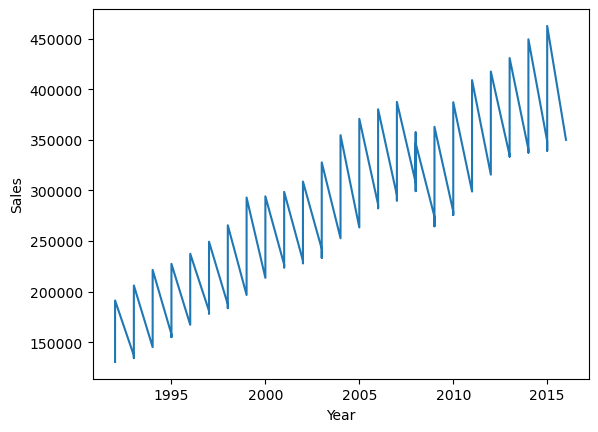

In [70]:
plt.plot(RetailDF['time.year'], RetailDF['data.sales.retail trade'])
plt.xlabel("Year")
plt.ylabel("Sales")

| Survey Type | Frequency of Data Collection | Coverage (Number of Firms) | Data Detail and Scope                                           | Usage and Release Timeframe                                |
|-------------|-----------------------------|----------------------------|----------------------------------------------------------------|------------------------------------------------------------|
| MARTS       | Monthly                     | Approx. 5,500              | Less detailed, aggregate figures                              | Short-term analysis, released ~2 weeks after reference month |
| ARTS        | Annual                      | Approx. 12,000             | More detailed, breakdowns by product lines, sectors, regions, and types of retailers | Long-term planning and trend analysis, released several months after reference year |


Text(0, 0.5, 'Sales')

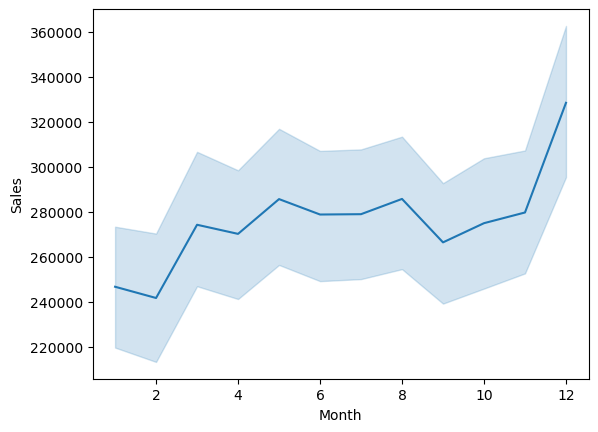

In [71]:
sns.lineplot(RetailDF, x=RetailDF['time.month'], y=RetailDF['data.sales.retail trade'])
plt.xlabel("Month")
plt.ylabel("Sales")

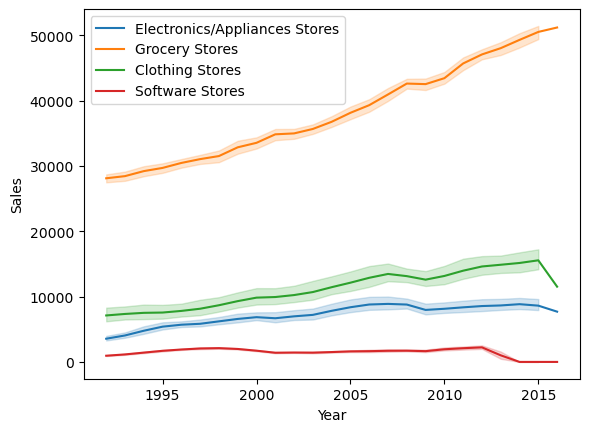

In [107]:
sns.lineplot(data=RetailDF, x=RetailDF['time.year'], y=RetailDF['data.sales.electronics and appliance stores'], label='Electronics/Appliances Stores')
sns.lineplot(data=RetailDF, x=RetailDF['time.year'], y=RetailDF['data.sales.grocery stores'], label='Grocery Stores')
sns.lineplot(data=RetailDF, x=RetailDF['time.year'], y=RetailDF['data.sales.clothing stores'], label='Clothing Stores')
sns.lineplot(data=RetailDF, x=RetailDF['time.year'], y=RetailDF['data.sales.computer and software stores'], label='Software Stores')

plt.xlabel("Year")
plt.ylabel("Sales")
plt.legend()

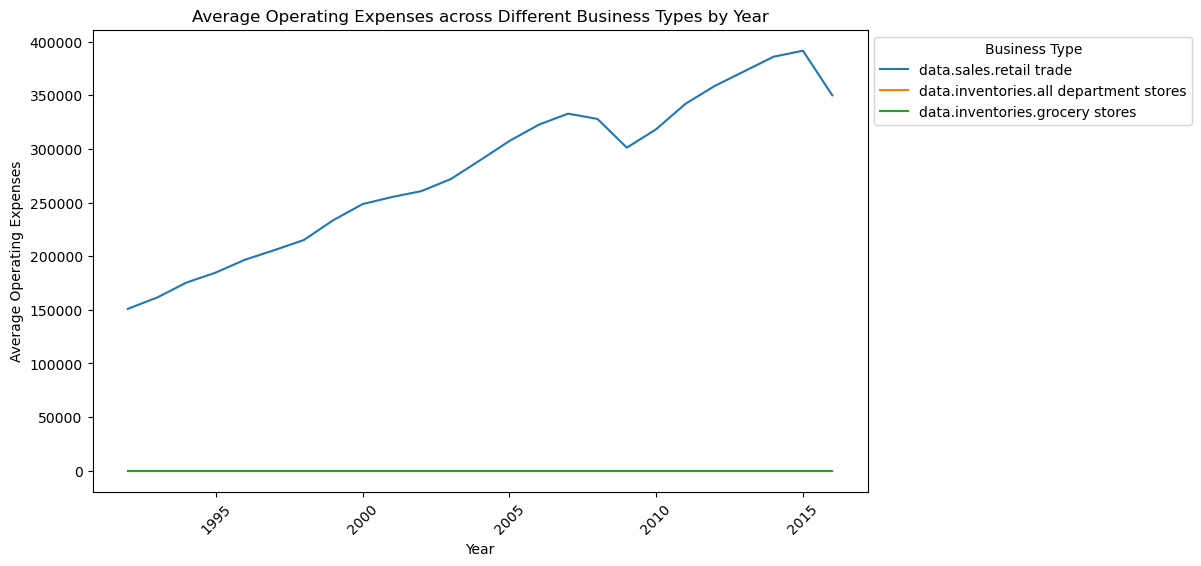